In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Monte Carlo and de Mere Die Games

What is the probability of rolling at least one 6 over 4 die? 

$(1 - \frac{5}{6}^4) \approx 0.517$

In [11]:
a = np.random.randint(1, 7, 4000)

In [12]:
a

array([1, 6, 6, ..., 5, 3, 2])

In [13]:
allprobs = []
trials = 1000
experiments = 300
for i in range(experiments):
    a = np.random.randint(1, 7, 4 * trials)
    allprobs.append(len([x for x in a.reshape(-1, 4) if 6 in x]) / trials)


In [14]:
sum(allprobs) / len(allprobs)

0.5175866666666665

(array([  1.,   1.,   3.,   8.,   6.,  13.,  13.,  17.,  29.,  29.,  39.,
         23.,  34.,  27.,  17.,  15.,  10.,  11.,   0.,   4.]),
 array([ 0.47  ,  0.4744,  0.4788,  0.4832,  0.4876,  0.492 ,  0.4964,
         0.5008,  0.5052,  0.5096,  0.514 ,  0.5184,  0.5228,  0.5272,
         0.5316,  0.536 ,  0.5404,  0.5448,  0.5492,  0.5536,  0.558 ]),
 <a list of 20 Patch objects>)

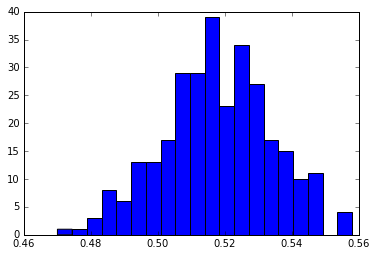

In [17]:
plt.hist(allprobs, 20)

For students: What is probability of getting at least one pair of 6 in 24 rolls of pairs of die?

$(1 - \frac{35}{36}^{24}) \approx 0.491$

In [164]:
[e for e in np.random.randint(1, 7, 48000).reshape((-1, 24, 2))]

In [174]:
allprobs = []
trials = 1000
experiments = 300
for i in range(experiments):
    count = 0
    for t in [e for e in np.random.randint(1, 7, 48 * trials).reshape((-1, 24, 2))]:
        found = False
        for p in t:
            if p[0] == 6 and p[1] == 6:
                found = True
        if found:
            count += 1    
    allprobs.append(count / trials)


In [175]:
sum(allprobs) / len(allprobs)

0.4910899999999997

(array([  1.,   2.,   5.,   7.,  16.,  15.,  21.,  38.,  26.,  34.,  35.,
         30.,  27.,  10.,  12.,  11.,   5.,   2.,   2.,   1.]),
 array([ 0.449 ,  0.4534,  0.4578,  0.4622,  0.4666,  0.471 ,  0.4754,
         0.4798,  0.4842,  0.4886,  0.493 ,  0.4974,  0.5018,  0.5062,
         0.5106,  0.515 ,  0.5194,  0.5238,  0.5282,  0.5326,  0.537 ]),
 <a list of 20 Patch objects>)

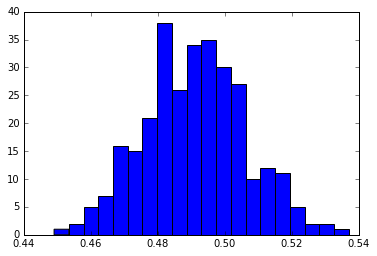

In [176]:
plt.hist(allprobs, 20)

# Random walks and Gambler's Ruin

Start with $20, flip a coin each turn, heads win 1, tails lose 1, for 200 timesteps. What is expected value?

In [150]:
trials = 500
time = 500
init = 20
overall = []
for t in range(trials):
    initial = [init]
    for i in range(time):
        if np.random.random() > 0.517:
            initial.append(initial[-1] + 1)
        else:
            initial.append(initial[-1] - 1)
        if initial[-1] == 0:
            break
    if len(initial) < time + 1:
        initial += [0] * (time + 1 - len(initial))
    overall.append(initial)

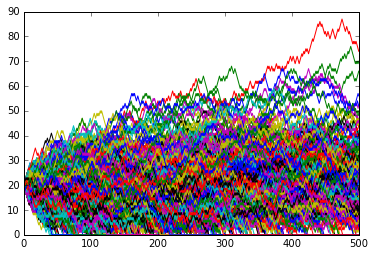

In [151]:
b = np.linspace(0, time, time + 1)
for o in overall:
    plt.plot(b, o)

In [152]:
ends = []
for o in overall:
    ends.append(o[-1])

(array([ 315.,   13.,   14.,   24.,   23.,   22.,   16.,   19.,   13.,
          12.,    9.,    7.,    6.,    1.,    2.,    1.,    0.,    1.,
           1.,    1.]),
 array([  0. ,   3.7,   7.4,  11.1,  14.8,  18.5,  22.2,  25.9,  29.6,
         33.3,  37. ,  40.7,  44.4,  48.1,  51.8,  55.5,  59.2,  62.9,
         66.6,  70.3,  74. ]),
 <a list of 20 Patch objects>)

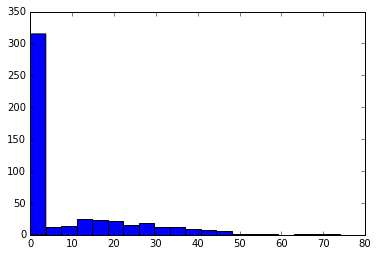

In [153]:
plt.hist(ends, 20)

In [154]:
sum(ends) / len(ends)

8.88

In [155]:
aves = []
n = np.array(overall)
for i in range(time + 1): 
    t = n[:, i]
    aves.append(sum(t) / trials)

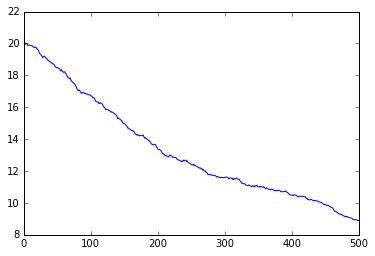

In [156]:
plt.plot(aves)